In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import imageio.v2 as imageio
import os
import PIL
import scipy.ndimage as ndi

# Load Data

In [160]:
train_dir = '../Capstone-Three-CNN/data/Training/'
test_dir = '../Capstone-Three-CNN/data/Testing/'

train_paths_unshuffled = []
train_labels_unshuffled = []

for label in os.listdir(train_dir):
    for image in os.listdir(f'{train_dir}{label}'):
        train_paths_unshuffled.append(f'{train_dir}{label}/{image}')
        train_labels_unshuffled.append(label)

#.shuffle is deprecated, find another way

In [161]:
len(train_paths_unshuffled)

5712

In [248]:
counts = Counter(train_labels_unshuffled)

for label in np.unique(train_labels_unshuffled):
    percent = round(counts[label] / len(train_labels_unshuffled) * 100, 2)
    print(f'{label}: {percent}%')    

glioma: 23.13%
meningioma: 23.44%
notumor: 27.92%
pituitary: 25.51%


Training dataset is relatively balanced.

In [223]:
train_folder = '../Capstone-Three-CNN/data/Training/'
test_folder = '../Capstone-Three-CNN/data/Testing/'

In [224]:
# function to create image array and label datasets
# converts to grayscale with Image.convert(), change uint8 to float, and normalize between 0 and 1 
# by dividing image through by 255

def create_im_dataset(im_folder):
    im_labels = []
    im_array = []
    for label in os.listdir(im_folder):
        for image in os.listdir(f'{im_folder}{label}'):
            size = (256,256)
            image = Image.open(f'{im_folder}{label}/{image}')
            image = image.resize(size, resample=Image.BICUBIC).convert('L') # trying bicubic as hopefully the best interpolation method
            image = np.array(image).astype('float32')
            image /= 255
            im_array.append(image)
            im_labels.append(label)
    return im_labels, im_array

In [225]:
# use create_im_dataset function to create datasets
train_im_labels, train_im_array = create_im_dataset(train_folder)

In [235]:
train_im_array = np.array(train_im_array)

In [165]:
# create dict of image classification labels
label_dict = {k: v for v, k in enumerate(np.unique(train_im_labels))}
label_dict

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [166]:
# convert string labels to enumerated labels
target_labels_num = [target_label_dict[train_im_labels[i]] for i in range(len(train_im_labels))]

In [167]:
len(train_im_labels) # sanity check, same number

5712

# Plot and view images

Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 252
Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (512, 512)
Image type:  uint8
Min, max:  0 253
Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (512, 512, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (512, 512)
Image type:  uint8
Min, max:  0 255
Array shape:  (236, 214, 3)
Image type:  uint8
Min, max:  0 255
Array shape:  (449, 359, 3)
Image type:  uint8
Min, max:  0 248
Array shape:  (781, 733, 3)
Image type:  uint8
Min, max:  0 255


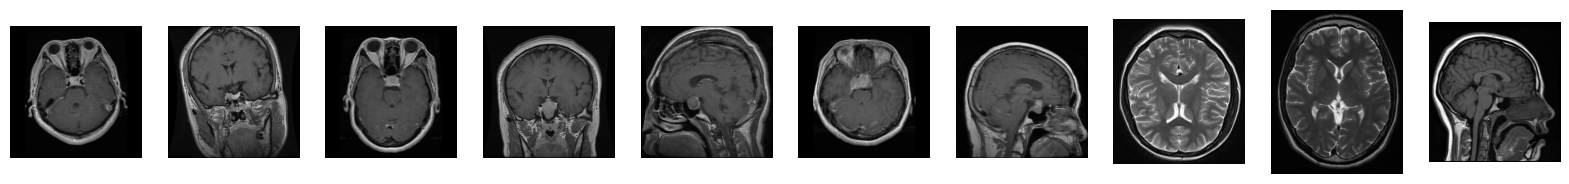

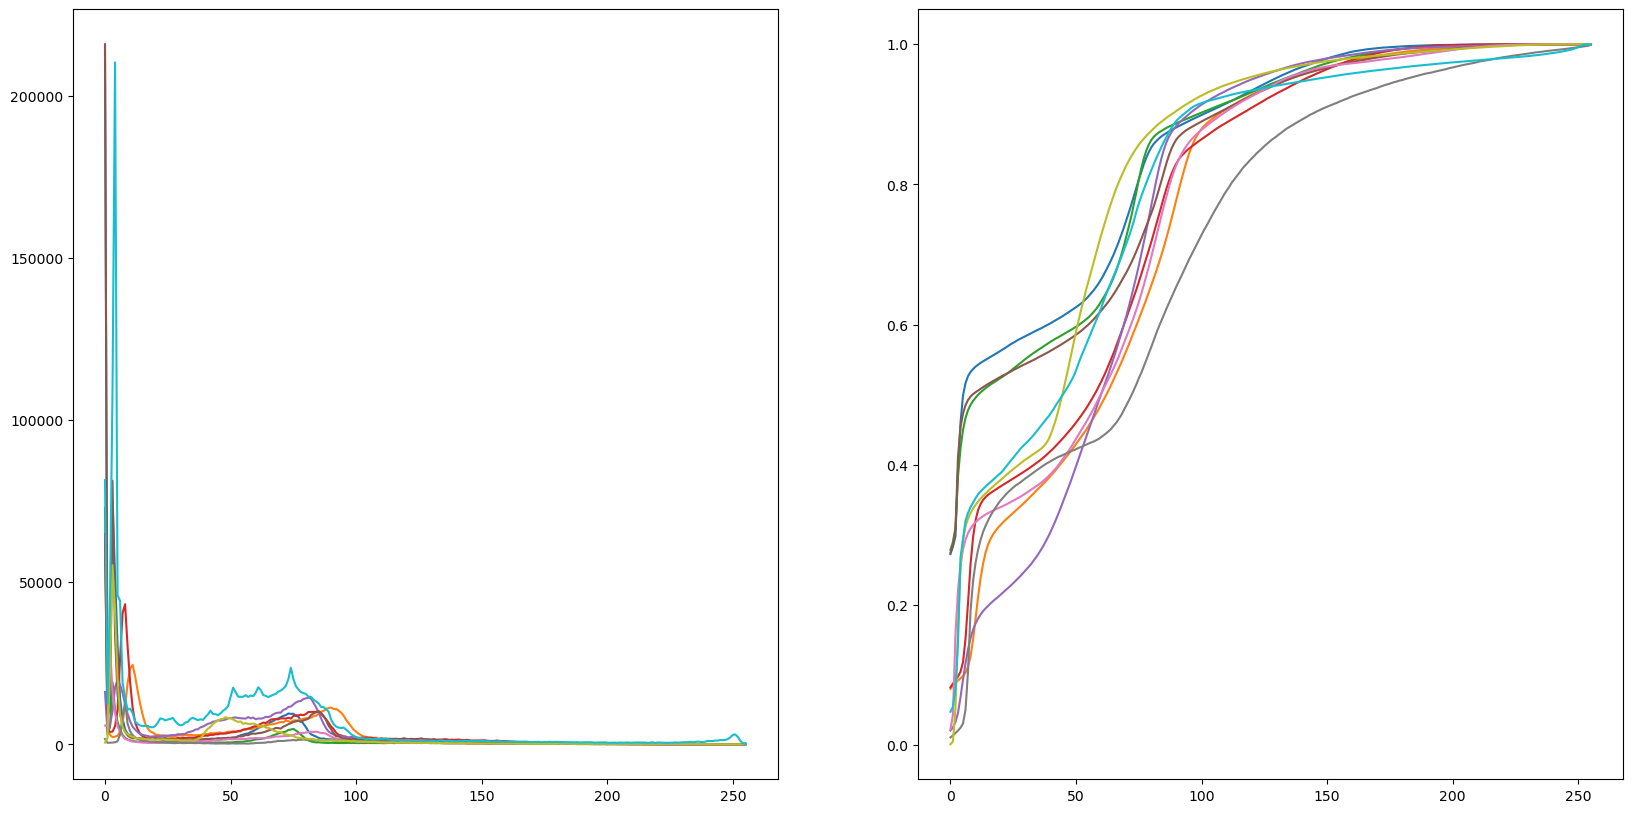

In [191]:
# print images (separated by 230)
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20,20))
fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
for i in range(10):
    im = imageio.imread(train_paths_unshuffled[i*230])
    print('Array shape: ', im.shape)
    print('Image type: ', im.dtype)
    print('Min, max: ', im.min(), im.max())
    axes[i].imshow(im, cmap='gray')
    axes[i].axis('off')
    hist = ndi.histogram(im, min=0, max=255, bins=256)
    cdf = hist.cumsum() / hist.sum()
    axes1[0].plot(hist, label='Histogram')
    axes1[1].plot(cdf, label='CDF')
plt.show()

Dataset contains images with differing shape/intensity

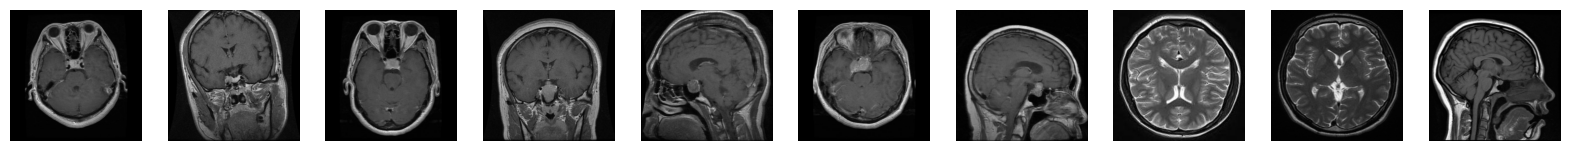

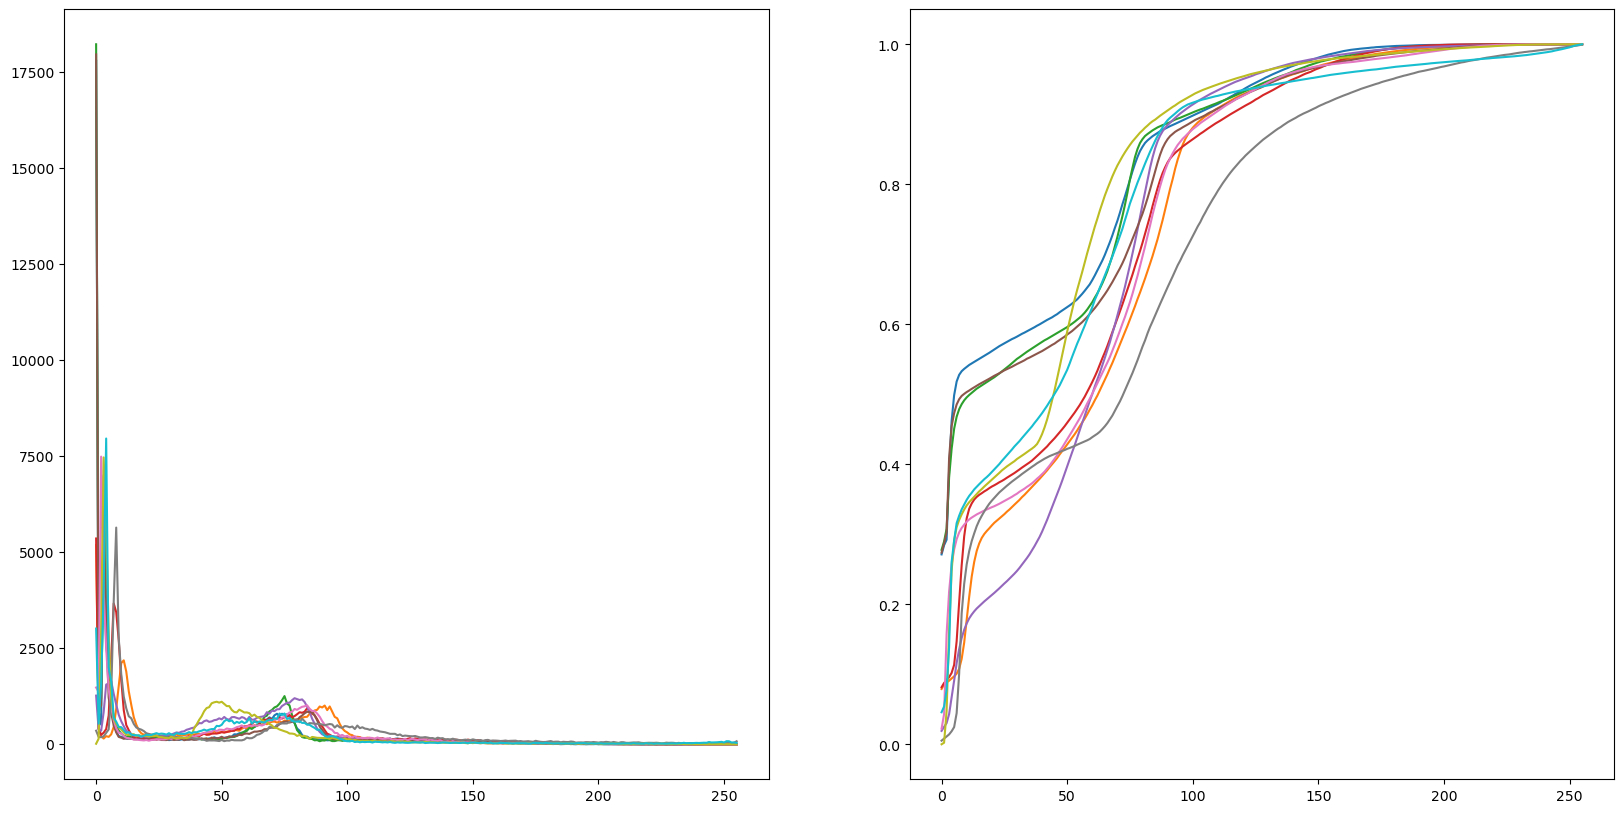

In [247]:
# try to plot images from resized and normalized array

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20,20))
fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
for i in range(10):
    arr = train_im_array*255
    PIL_image = Image.fromarray(arr[i*230])
    axes[i].imshow(PIL_image, cmap='gray')
    axes[i].axis('off')
    hist = ndi.histogram(PIL_image, min=0, max=255, bins=256)
    cdf = hist.cumsum() / hist.sum()
    axes1[0].plot(hist, label='Histogram')
    axes1[1].plot(cdf, label='CDF')
plt.show()

After some preprocessing, images hist appears more uniform

In [ ]:
# enhance images - brightness, contrast


In [ ]:
# use masks - skull stripping? crop neck? 


In [ ]:
# augment images to train on or validate on


In [ ]:
# build basic model

In [ ]:
# utilize pre-made model